### 50_days_ML||DL FOR DATA SCIENCE 
  

In [250]:
import numpy as np
import pandas as pd


In [251]:
df=pd.read_csv('./placement.csv')

In [252]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [253]:
df.shape

(100, 4)

----
### Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model 
-----

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [255]:
df =df.iloc[:,1:]     #  removed the unnessary columns 

In [256]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [257]:
import matplotlib.pyplot as plt

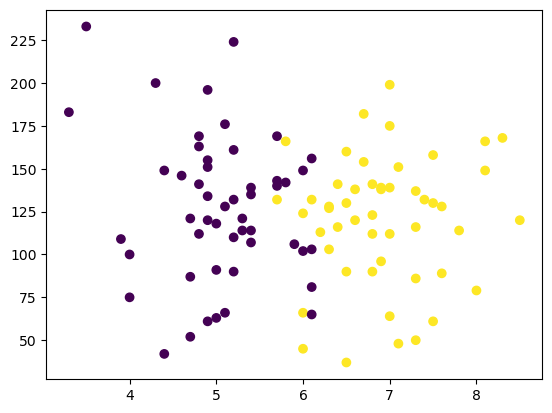

In [258]:
plt.scatter(df['cgpa'],df['iq'] , c=df['placement'])

In [259]:
# Selecting columns for features
X = df.iloc[:, [0, 2]]

# Selecting the last column for the target variable
y = df.iloc[:, -1]


In [260]:
X

,cgpa,placement
0,6.8,1
1,5.9,0
2,5.3,0
3,7.4,1
4,5.8,0
...,...,...
95,4.3,0
96,4.4,0
97,6.7,1
98,6.3,1


In [261]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [262]:
from sklearn.model_selection import train_test_split

X_trin, X_test, y_train, y_test =train_test_split(X,y ,test_size=0.1)

In [263]:
X_trin

,cgpa,placement
28,5.2,0
9,5.1,0
40,4.9,0
16,5.2,0
0,6.8,1
...,...,...
99,6.2,1
71,6.1,1
3,7.4,1
36,5.7,0


In [264]:
y_train

28    0
9     0
40    0
16    0
0     1
     ..
99    1
71    1
3     1
36    0
46    0
Name: placement, Length: 90, dtype: int64

In [265]:
X_test

,cgpa,placement
25,5.0,0
24,4.7,0
85,5.8,1
58,8.0,1
7,5.0,0
22,4.9,0
86,5.1,0
63,6.3,1
56,6.1,0
15,5.1,0


In [266]:
from sklearn.preprocessing import  StandardScaler

In [267]:
scaler = StandardScaler()

In [268]:
X_trin=scaler.fit_transform(X_trin)

In [269]:
X_trin

array([[-0.72652547, -1.04547753],
       [-0.81359244, -1.04547753],
       [-0.98772637, -1.04547753],
       [-0.72652547, -1.04547753],
       [ 0.666546  ,  0.95650071],
       [ 1.10188084,  0.95650071],
       [-0.98772637, -1.04547753],
       [-1.07479334, -1.04547753],
       [-0.1170567 , -1.04547753],
       [ 1.36308174,  0.95650071],
       [ 0.4053451 ,  0.95650071],
       [-2.20666391, -1.04547753],
       [-1.77132908, -1.04547753],
       [-1.24892727, -1.04547753],
       [ 1.27601478,  0.95650071],
       [-1.85839605, -1.04547753],
       [ 0.84067994,  0.95650071],
       [-2.38079785, -1.04547753],
       [-0.02998973,  0.95650071],
       [ 0.666546  ,  0.95650071],
       [ 1.53721568,  0.95650071],
       [ 0.49241207,  0.95650071],
       [-0.6394585 , -1.04547753],
       [-0.02998973,  0.95650071],
       [-0.02998973,  0.95650071],
       [-0.20412367, -1.04547753],
       [-1.42306121, -1.04547753],
       [-0.55239154, -1.04547753],
       [ 0.49241207,

In [270]:
X_test =scaler.transform(X_test)

In [271]:
X_test

array([[-0.90065941, -1.04547753],
       [-1.16186031, -1.04547753],
       [-0.20412367,  0.95650071],
       [ 1.71134961,  0.95650071],
       [-0.90065941, -1.04547753],
       [-0.98772637, -1.04547753],
       [-0.81359244, -1.04547753],
       [ 0.23121117,  0.95650071],
       [ 0.05707723, -1.04547753],
       [-0.81359244, -1.04547753]])

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
clf = LogisticRegression()

In [274]:
clf.fit(X_trin, y_train)

LogisticRegression()

In [275]:
y_pred =clf.predict(X_test)

In [276]:
y_test

25    0
24    0
85    1
58    1
7     0
22    0
86    0
63    1
56    0
15    0
Name: placement, dtype: int64

In [277]:
from sklearn.metrics import accuracy_score

In [278]:
accuracy_score(y_test,y_pred)

1.0

In [279]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

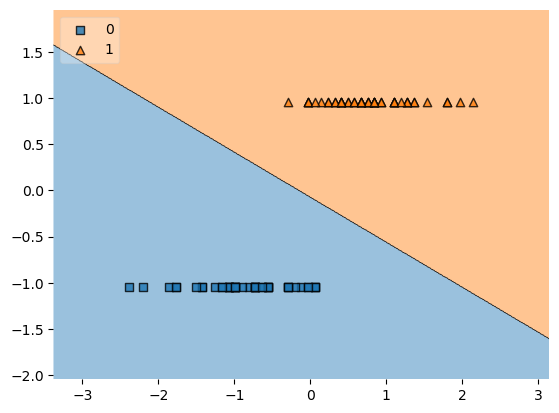

In [280]:
plot_decision_regions(X_trin, y_train.values, clf=clf , legend=2)

In [281]:
import pickle 

In [282]:
pickle.dump(clf,open('model.pkl', 'wb'))